# Genesis: The beginning

## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler, PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.linear_model import BayesianRidge, Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt      
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data Preparation and insights

In [2]:
df = pd.read_csv("nigeria_houses_data.csv")

In [7]:
## Dataset has 24326 rows and 8 columns
#Parameters:

#- bedrooms -> number of bedrooms in the houses
#- bathrooms -> number of bathrooms in the houses
#- toilets -> number of toilets 
#- parking_space
#- title -> house type
#- town -> town in which the house is located
#- state -> state within Nigeria in which the house is located and finally
#- price -> the target column.


In [3]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [4]:
## Lets investigate how many values are missing in the dataset.
df.isnull().sum()
# Apparently no value is missing, So we do not impute here. And move to the next step

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [ ]:
## Lets investigate the bedrooms
#goals
# - How many missig values
# - How can to impute missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [8]:
## Lets Investigate Skewness in the dataset with the numerical columns and zero-inflated columns
numerical_columns = df.select_dtypes(include=['number'])

In [62]:
## Observing the dataset, there is no significant outlier here

In [9]:
## Find zero inftated rows
freqTable = (numerical_columns == 0).mean()
# no column as 0 as its column, Then we move to the next stage o meature its skewness

In [10]:
skewTable = numerical_columns.skew(axis=0).sort_values(ascending=False)

In [11]:
skewTable

price            135.030477
parking_space      0.534364
bedrooms           0.182650
bathrooms         -0.022984
toilets           -0.693457
dtype: float64

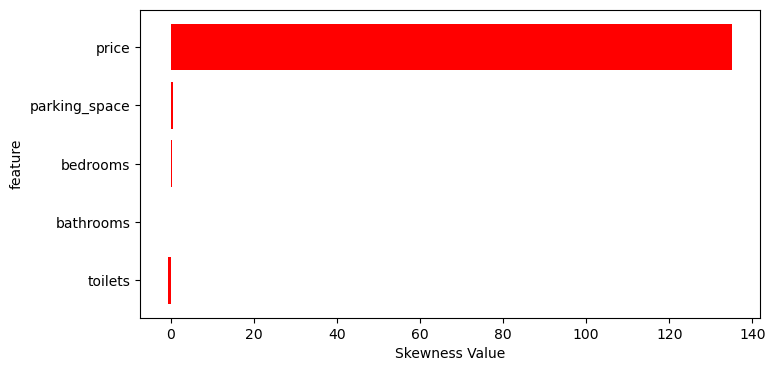

In [12]:
skewTable = numerical_columns.skew(axis=0).sort_values(ascending=False).reset_index()
skewTable.columns = ['feature', 'skewness_value']
plt.figure(figsize=(8,4))
plt.barh(skewTable['feature'],skewTable['skewness_value'],color="red")
plt.xlabel("Skewness Value")
plt.ylabel("feature")
plt.gca().invert_yaxis()
plt.show()

In [39]:
## It can be observed that Price is significantly skewed, It defies the law of normal distribution which our model is expecting for the dataset to be passed for training.
## The other features have negligible skewness
## It can be ssen that bathroom isnt even skewed
## Different ways to migated skewing will be observed using.
# -log transformation, scaling with squared

<Axes: >

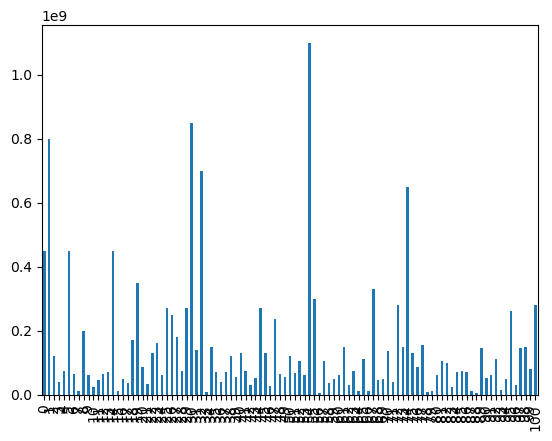

In [45]:
## The histogram distribution of the Price of the first 5000
numerical_columns.loc[:100,"price"].plot(kind="bar")

In [47]:
# # developing a histogram using HISTPLOT, with Price as x variable 
# sns.histplot(data=df, x="price",kde=True)
# plt.title(label   = "Price Distribution")
# plt.xlabel(xlabel = "price") # avoiding using dataset labels
# plt.ylabel(ylabel = "Count")

In [15]:
## Now dealing with correlation table
housing_corr = numerical_columns.corr(method="pearson")
housing_corr.loc[:,"price"].sort_values(ascending=False)

price            1.000000
bedrooms         0.025734
bathrooms        0.021965
parking_space    0.018370
toilets          0.015486
Name: price, dtype: float64

In [19]:
categorical_columns = df.select_dtypes(include=['object_'])

In [20]:
categorical_columns.columns

Index(['title', 'town', 'state'], dtype='object')

In [21]:
categorical_columns.columns.tolist()
# categorical_columns["title"].unique()
for col in categorical_columns.columns.tolist():
    print(f"{col} - {categorical_columns[col].unique()} - {len(categorical_columns[col].unique())} ")

title - ['Detached Duplex' 'Terraced Duplexes' 'Semi Detached Duplex'
 'Detached Bungalow' 'Block of Flats' 'Semi Detached Bungalow'
 'Terraced Bungalow'] - 7 
town - ['Mabushi' 'Katampe' 'Lekki' 'Ajah' 'Epe' 'Lokogoma District' 'Oredo'
 'Victoria Island (VI)' 'Mowe Ofada' 'Ikeja' 'Ikoyi' 'Magodo' 'Kaura'
 'Galadimawa' 'Gwarinpa' 'Abeokuta North' 'Lugbe District' 'Ibeju Lekki'
 'Yaba' 'Sango Ota' 'Ifako-Ijaiye' 'Agege' 'Ikorodu' 'Jahi' 'Ibadan'
 'Orozo' 'Ifo' 'Owerri North' 'Guzape District' 'Idu Industrial'
 'Owerri Municipal' 'Isheri North' 'Utako' 'Port Harcourt' 'Kuje' 'Isheri'
 'Life Camp' 'Ipaja' 'Ado-Odo/Ota' 'Dape' 'Mushin' 'Ejigbo' 'Isolo'
 'Ojodu' 'Gaduwa' 'Enugu' 'Dakwo' 'Asokoro District' 'Alimosho' 'Sagamu'
 'Chikun' 'Egbeda' 'Wuye' 'Kubwa' 'Shomolu' 'Ogudu' 'Owerri West' 'Ibafo'
 'Surulere' 'Obio-Akpor' 'Ayobo' 'Apo' 'Mowe Town' 'Ibadan South-West'
 'Wuse 2' 'Durumi' 'Simawa' 'Arepo' 'Ikotun' 'Oluyole' 'Maitama District'
 'Maryland' 'Ido' 'Karsana' 'Wuse' 'Ilorin West' 'K

In [15]:
pie_state = df.groupby("state").mean().sort_values(by="price",ascending=False)

C:\Users\emryz\AppData\Local\Temp\ipykernel_2980\2174703228.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pie_state = df.groupby("state").mean().sort_values(by="price",ascending=False)


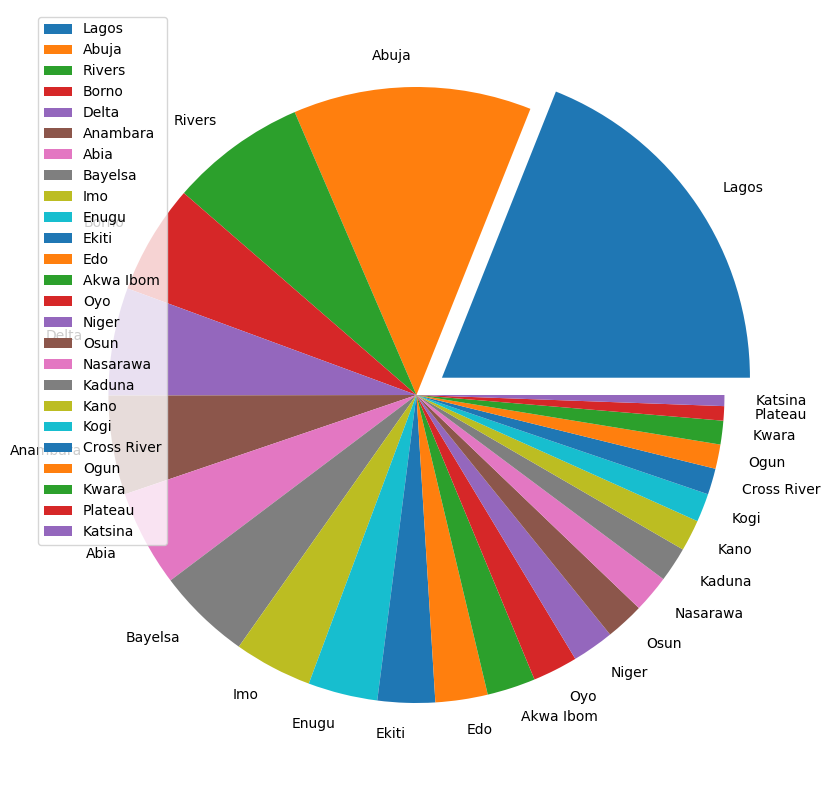

In [16]:
# Pie chart of the price distribution
labels = pie_state["price"].index.tolist()
values = pie_state["price"].values.tolist()
explode = [0] * len(labels)
explode[0] = 0.1
plt.figure(figsize=(10,10))
plt.pie(values, labels = labels, explode = explode,shadow = False)
plt.legend(loc="best" )
plt.show() 

## Pie chart for Each State to determine the most expensive regions

In [35]:
temp_df = df.copy()

In [25]:
pie_state_town = temp_df.groupby(["state","town"]).mean()

C:\Users\emryz\AppData\Local\Temp\ipykernel_11876\3216399053.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pie_state_town = temp_df.groupby(["state","town"]).mean()


In [29]:
pie_state_town

bedrooms  bathrooms   toilets  parking_space  \
state  town                                                             
Abia   Aba               4.125000   4.875000  5.125000       4.375000   
       Umuahia           3.000000   3.000000  3.000000       1.000000   
Abuja  Apo               4.287671   4.657534  5.232877       4.534247   
       Asokoro District  5.496503   5.230769  5.580420       3.349650   
       Bwari             2.875000   3.125000  3.750000       4.625000   
...                           ...        ...       ...            ...   
Rivers Eleme             5.500000   6.500000  6.000000       3.250000   
       Ikwerre           4.000000   4.000000  5.000000       1.000000   
       Obio-Akpor        3.666667   5.166667  5.166667       3.500000   
       Oyigbo            4.000000   4.000000  5.000000       6.000000   
       Port Harcourt     4.375000   4.706019  5.231481       4.784722   

                                price  
state  town                            
Abia   Aba               9.562500e+07  
       Umuahia           6.500000e+07  
Abuja  Apo               1.119041e+08  
       Asokoro District  6.021501e+08  
       Bwari             3.762500e+07  
...                               ...  
Rivers Eleme             4.575000e+07  
       Ikwerre           2.000000e+07  
       Obio-Akpor        5.750000e+07  
       Oyigbo            2.500000e+07  
       Port Harcourt     1.326223e+08  

[221 rows x 5 columns]

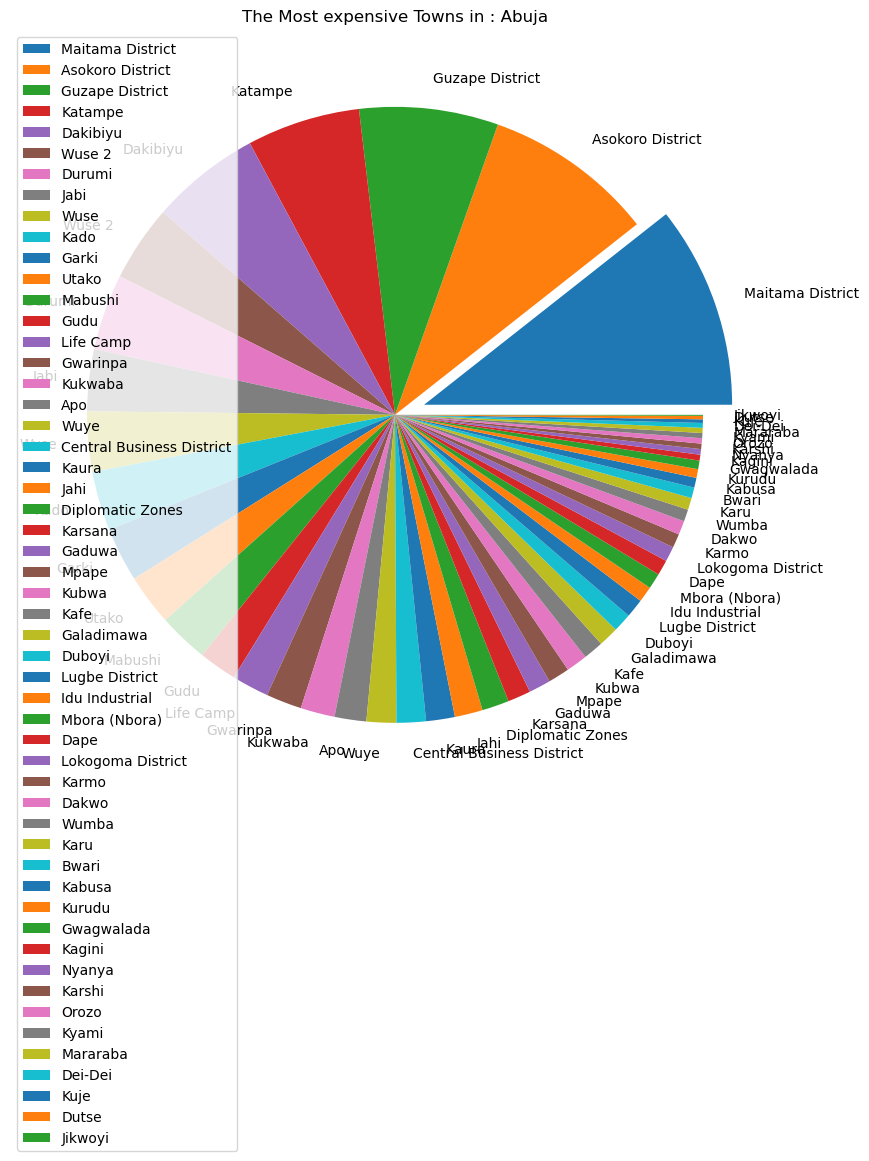

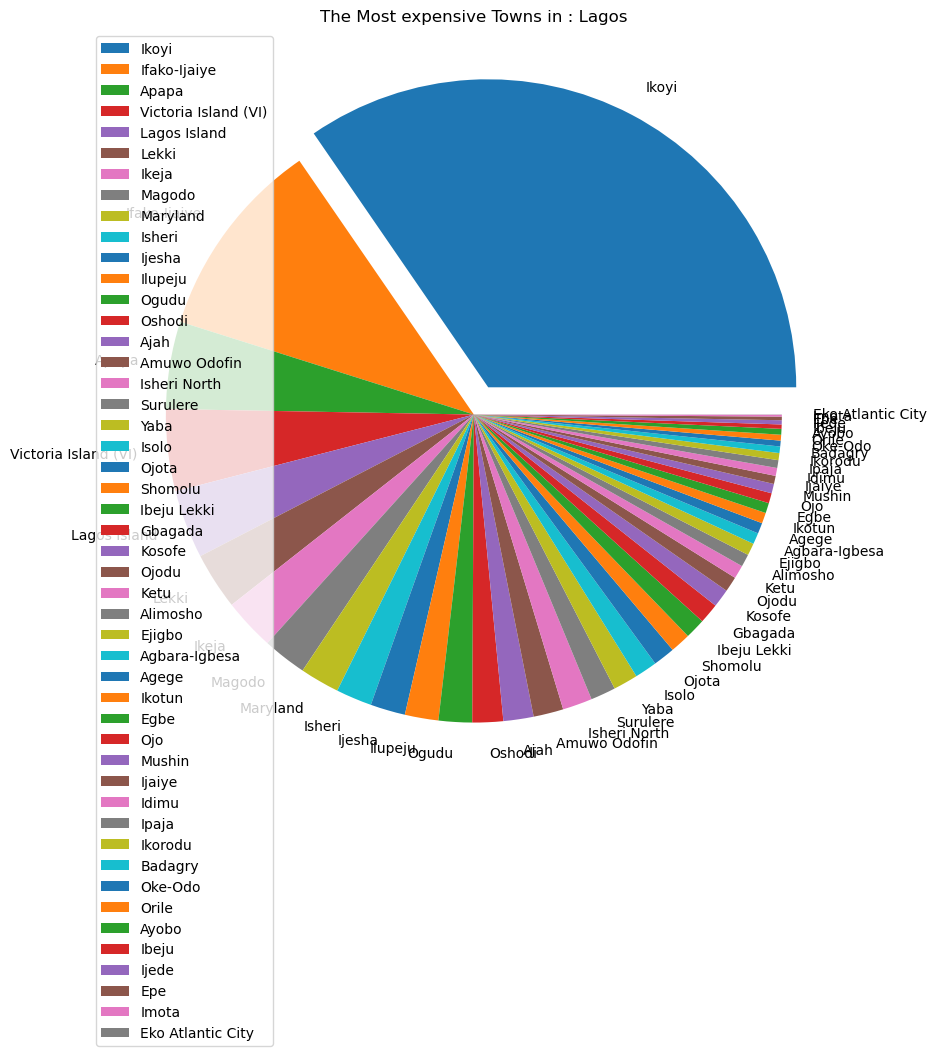

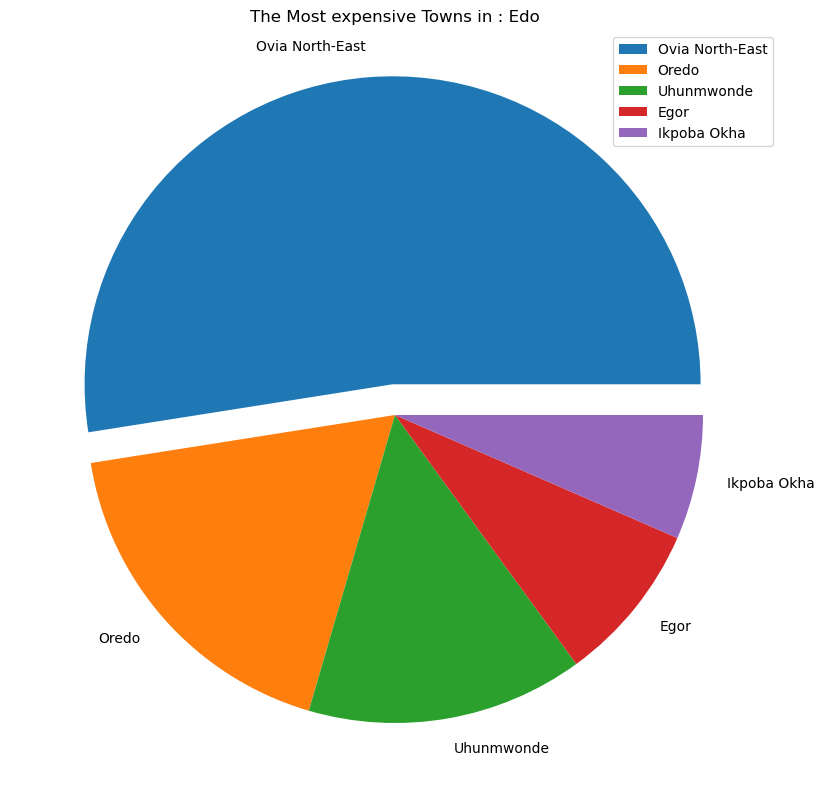

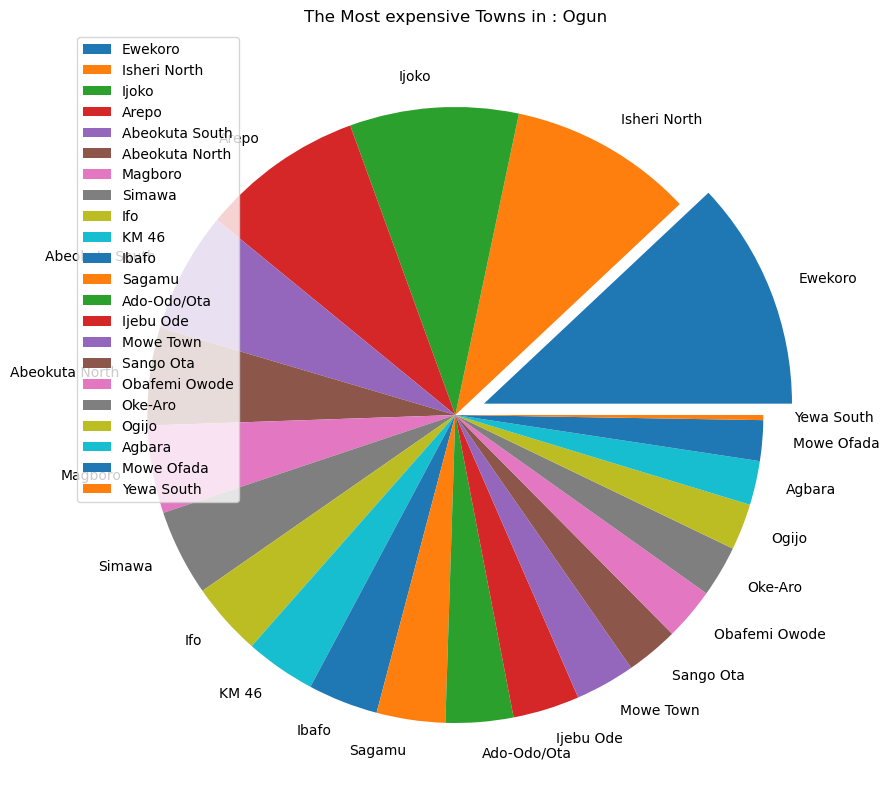

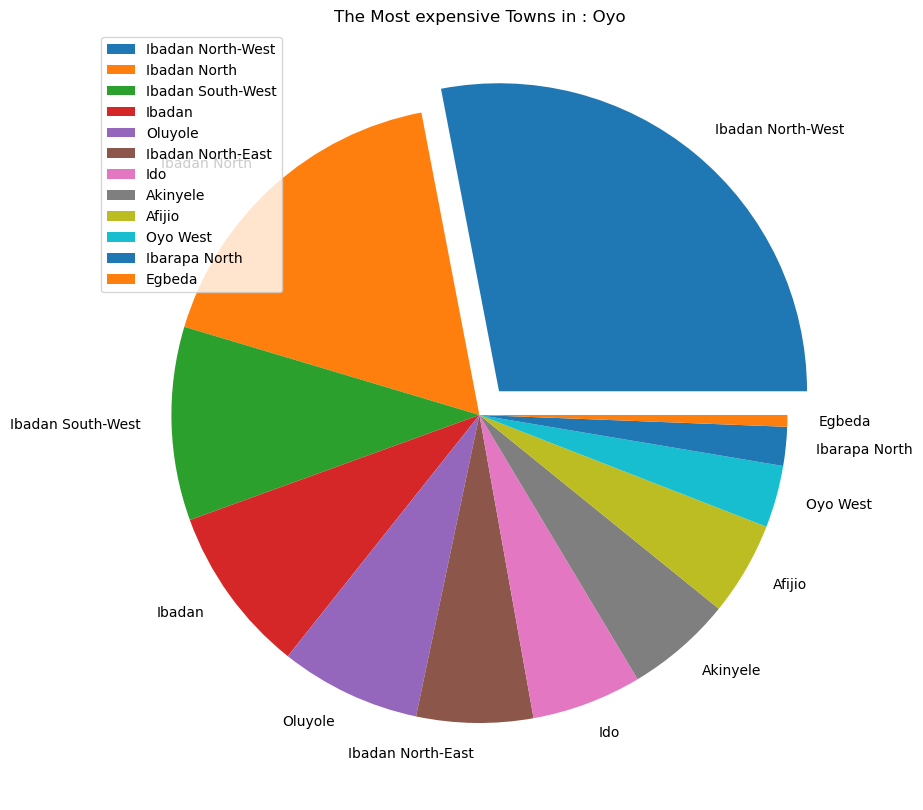

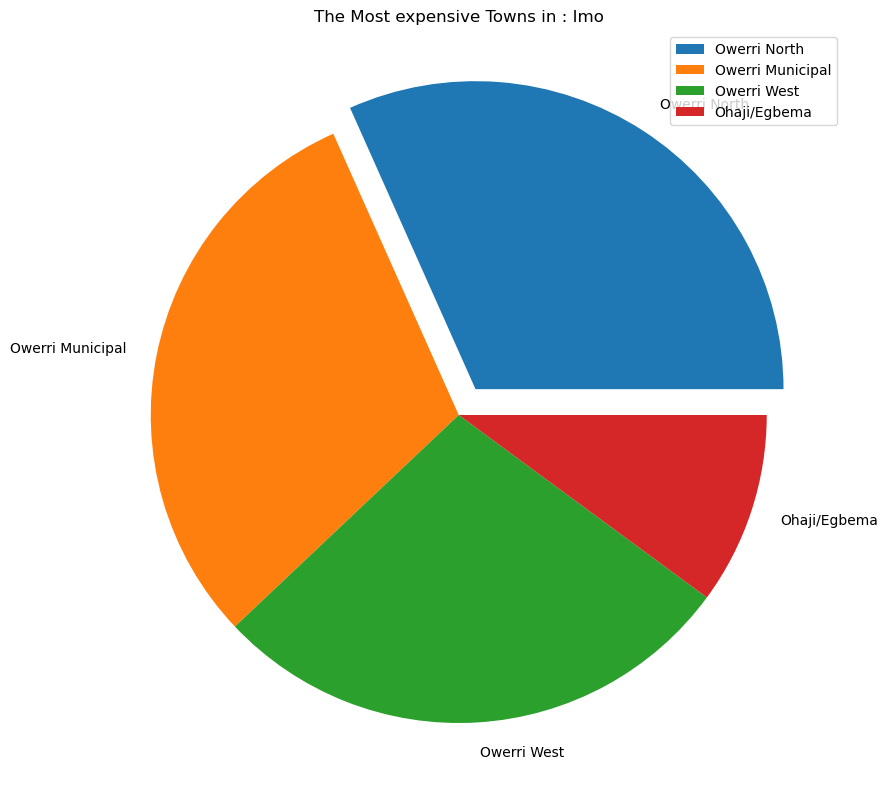

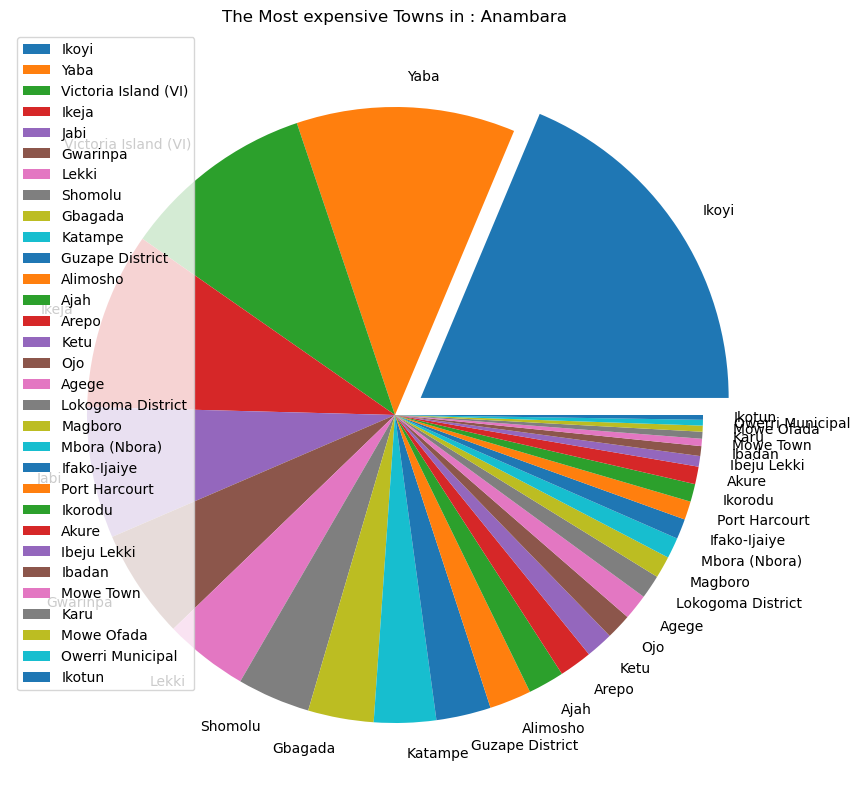

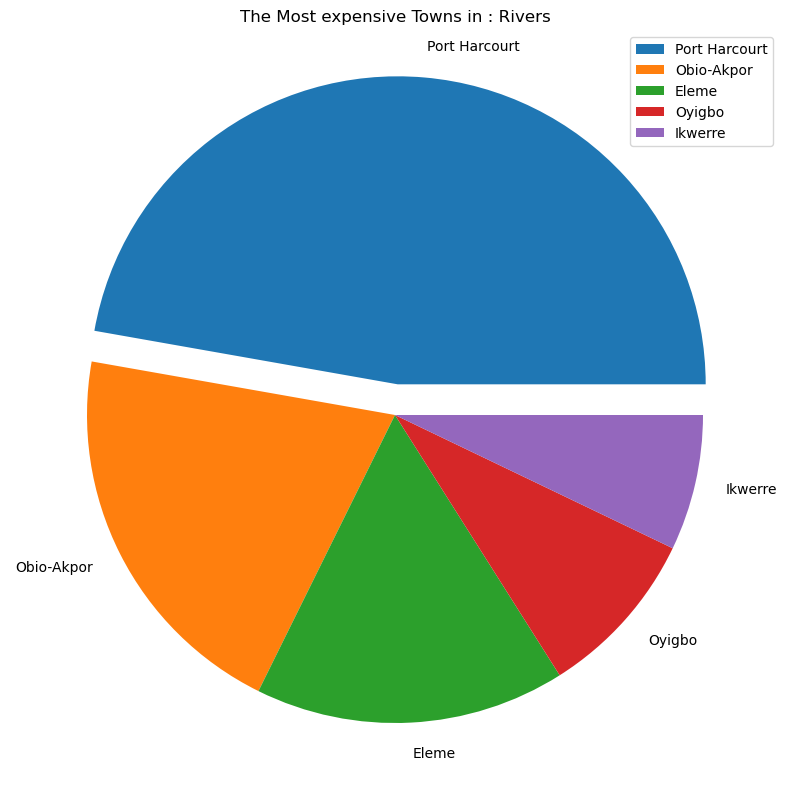

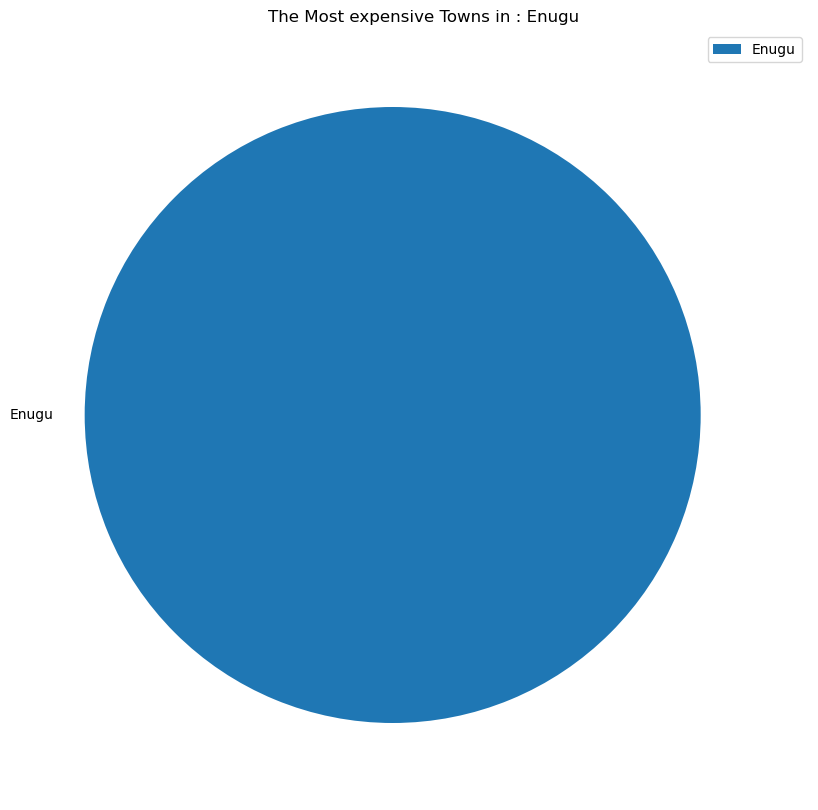

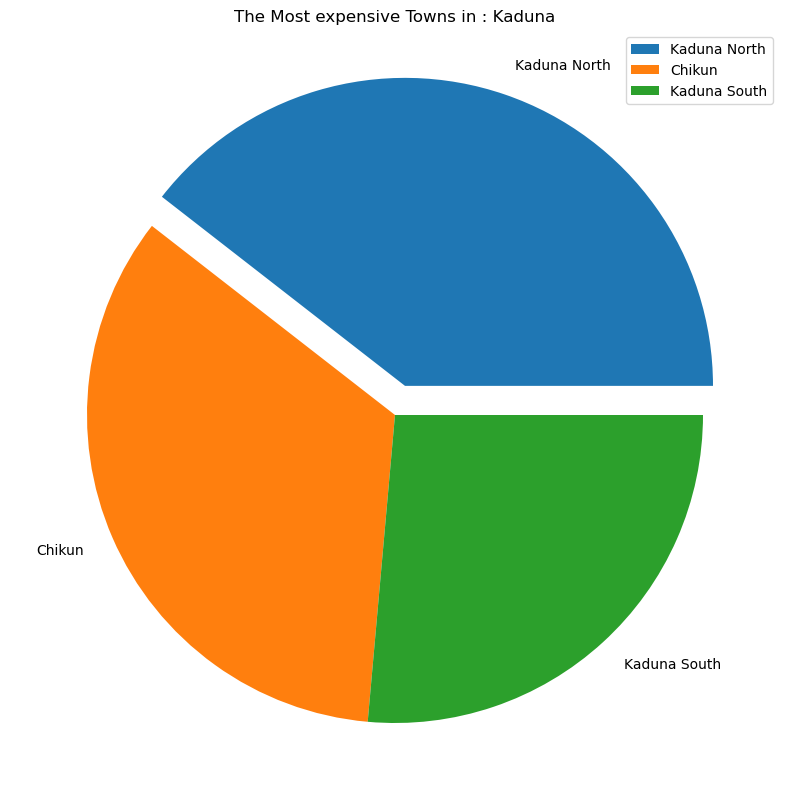

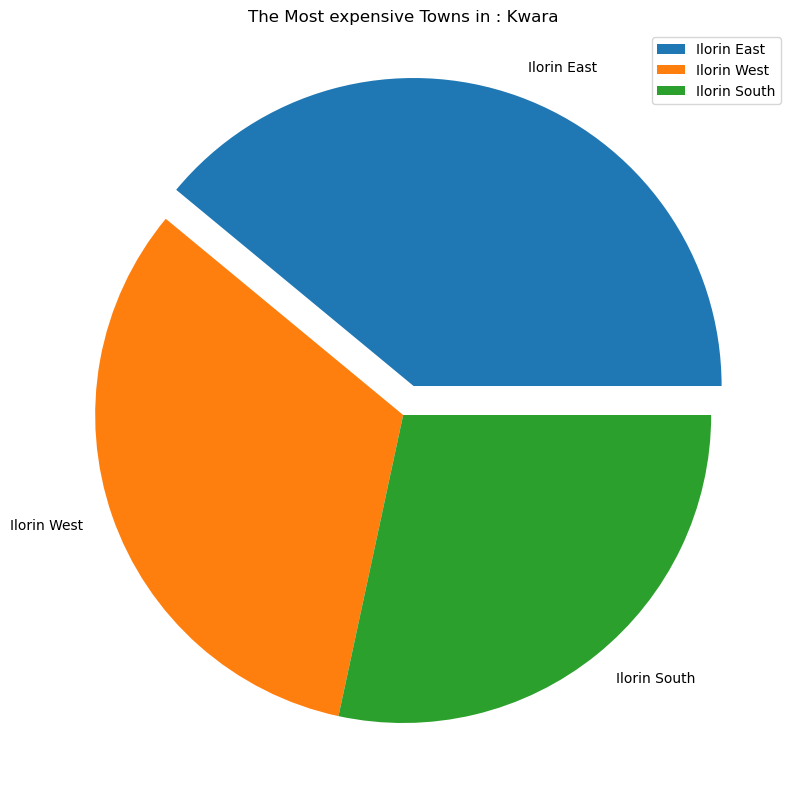

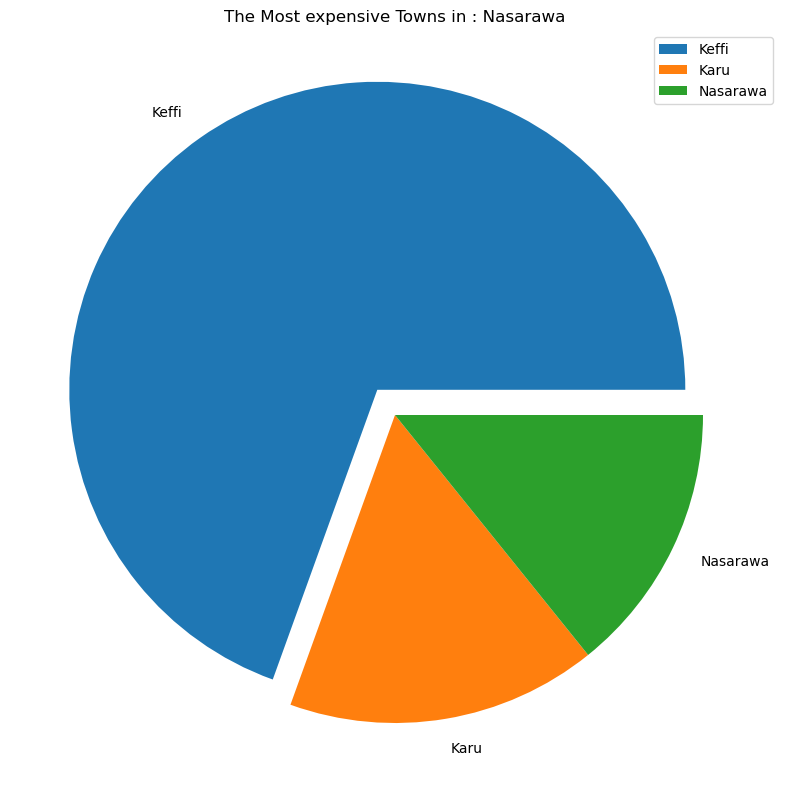

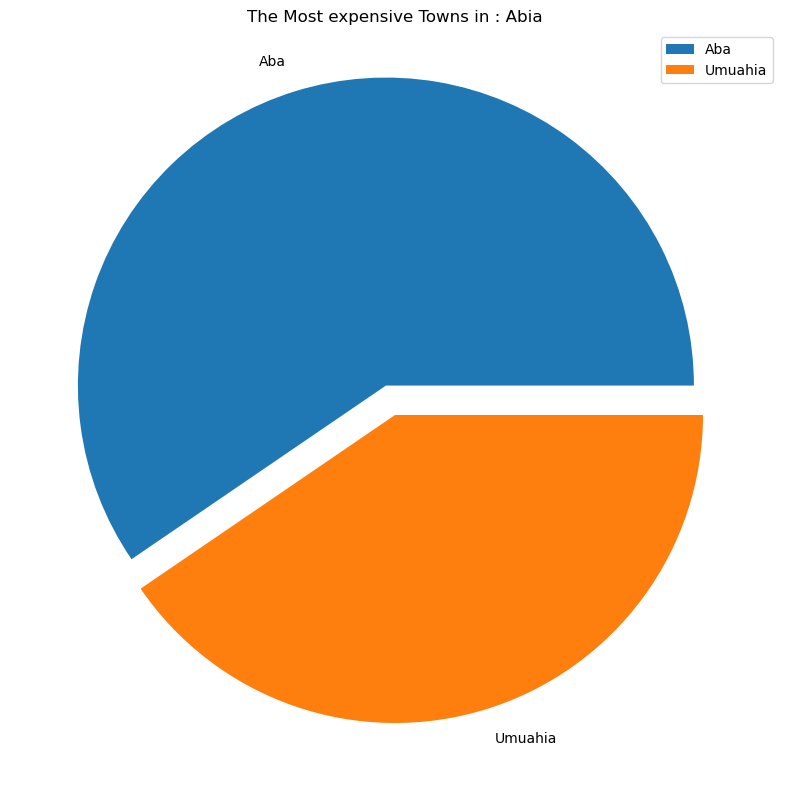

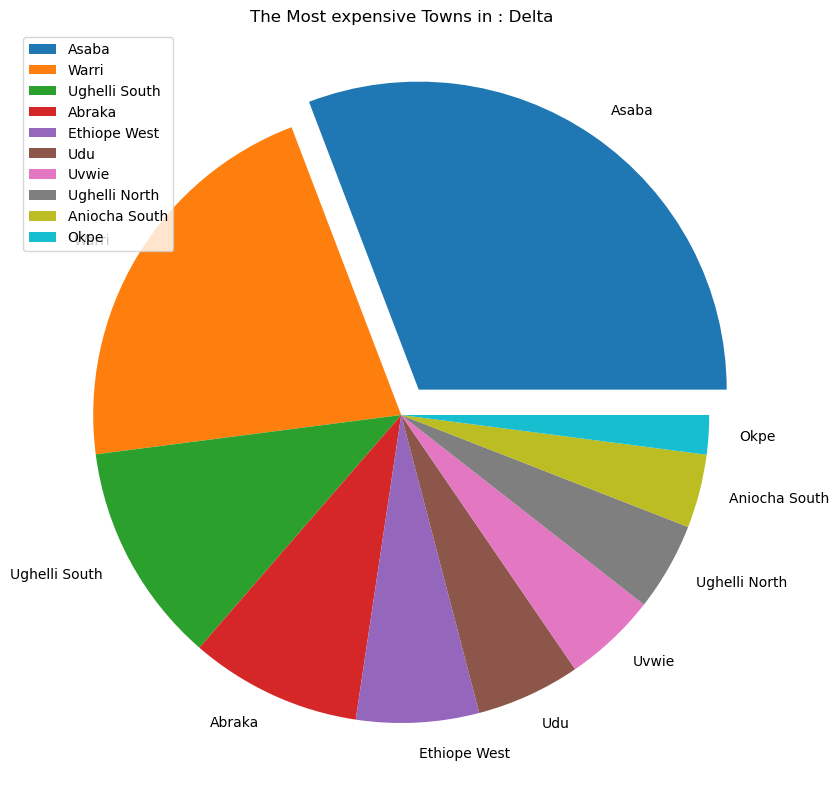

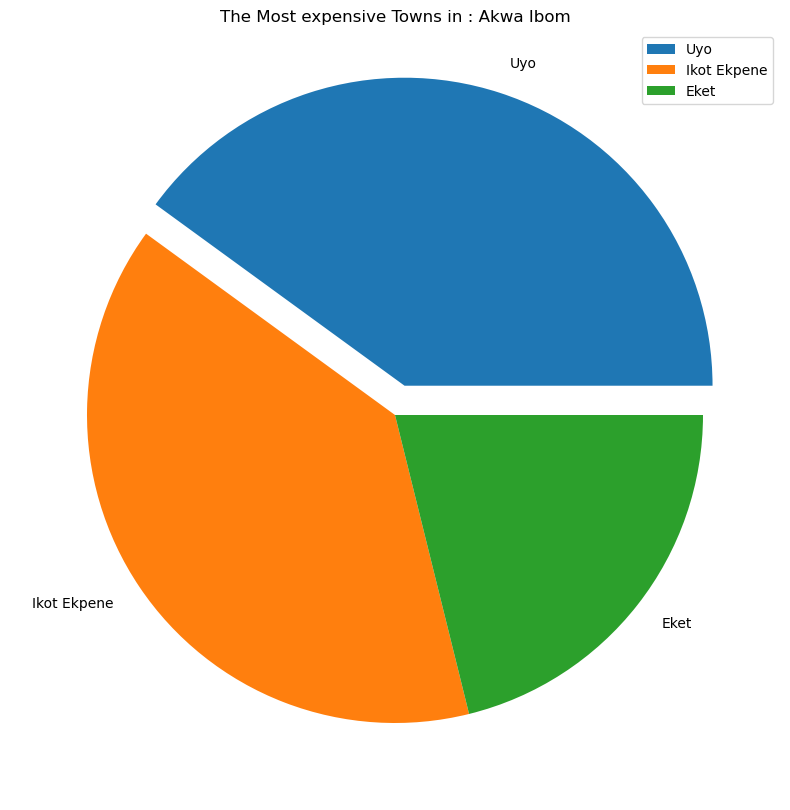

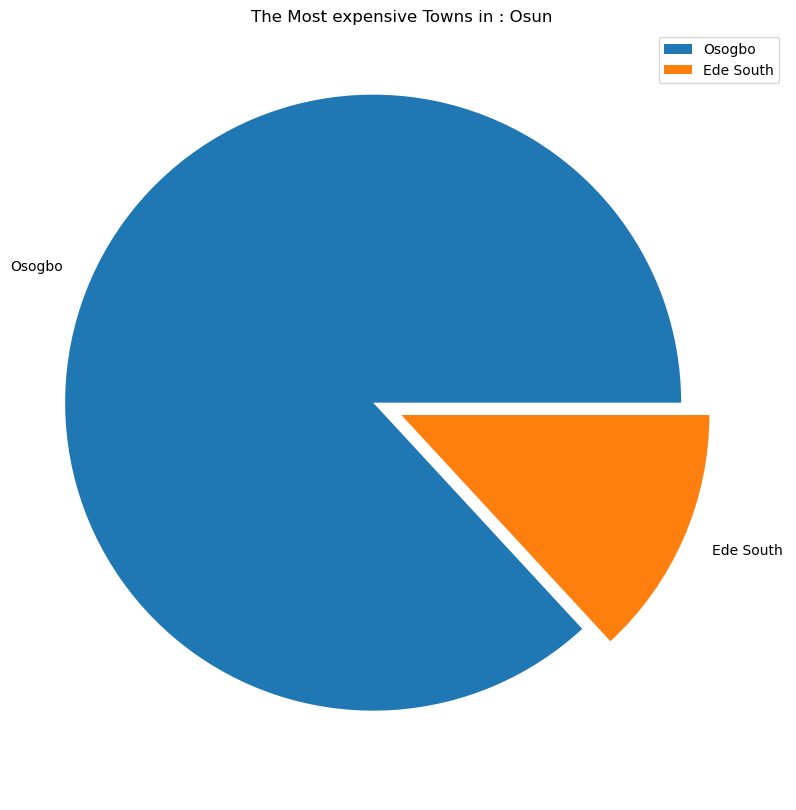

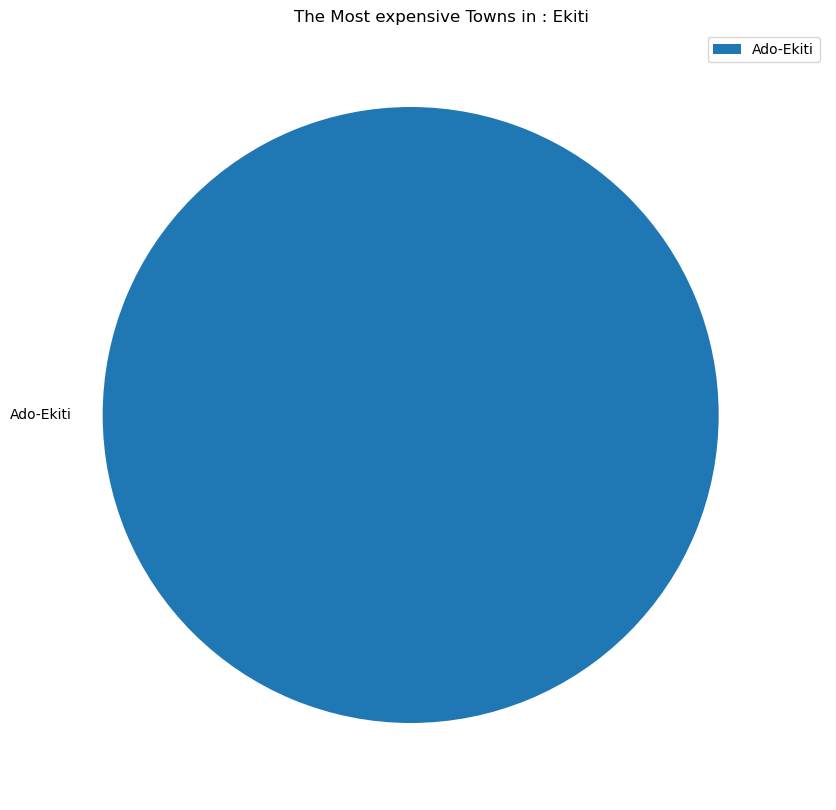

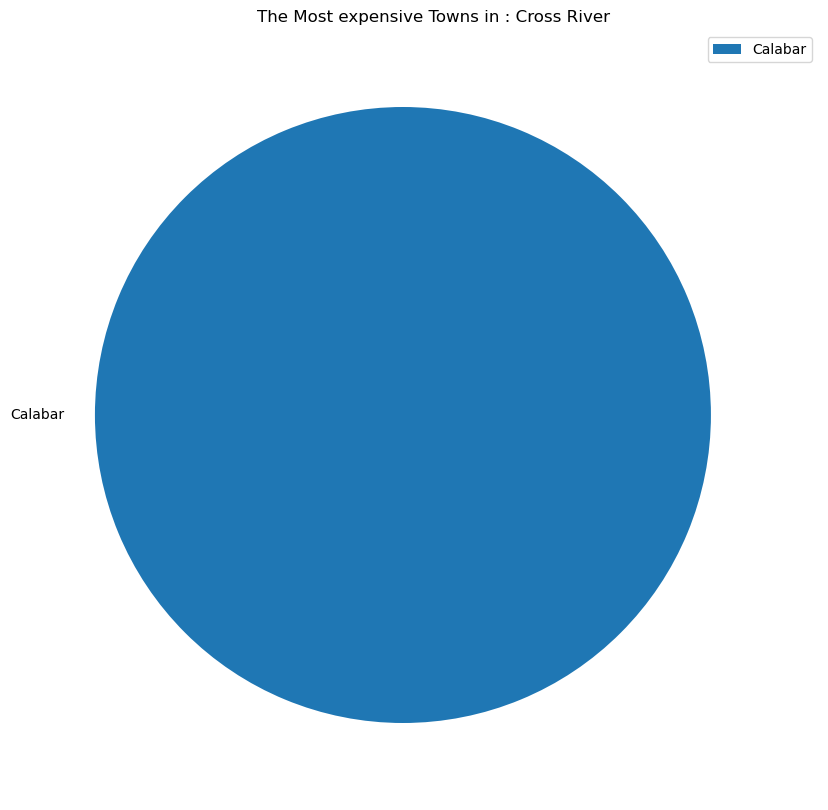

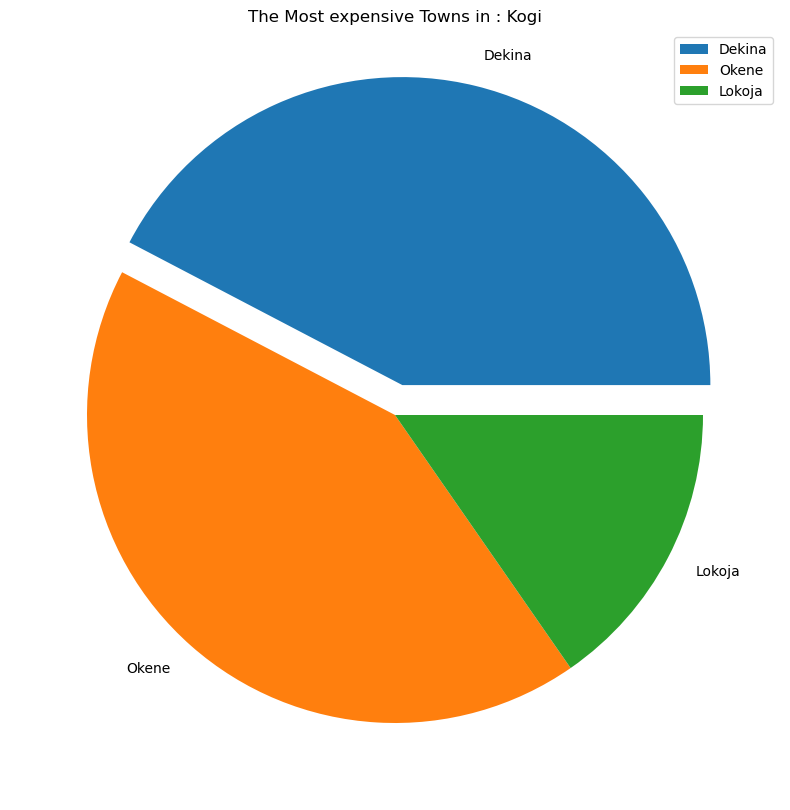

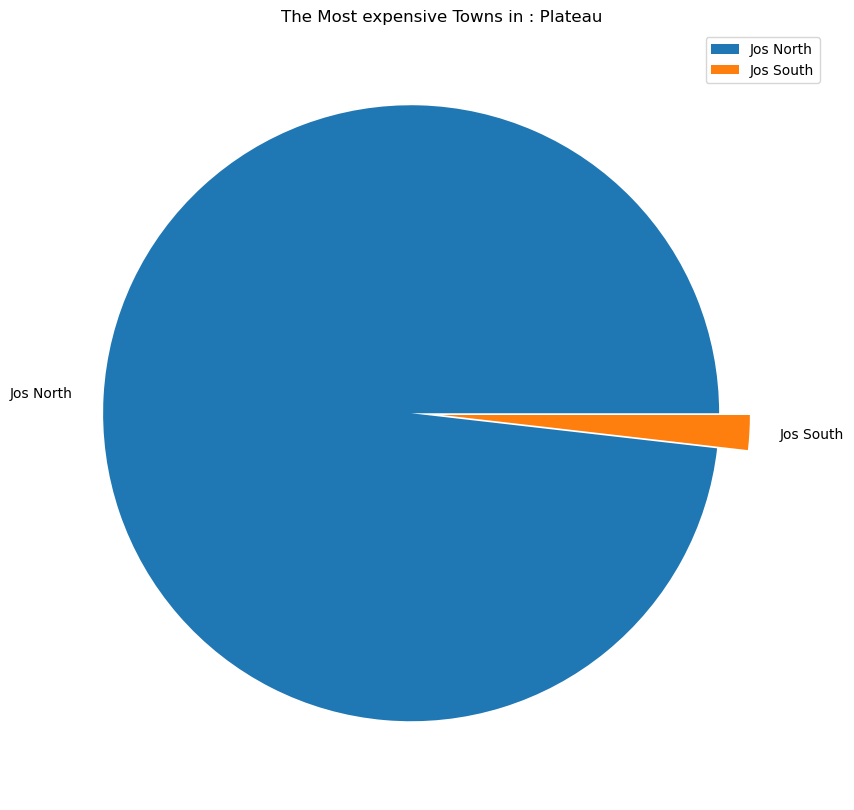

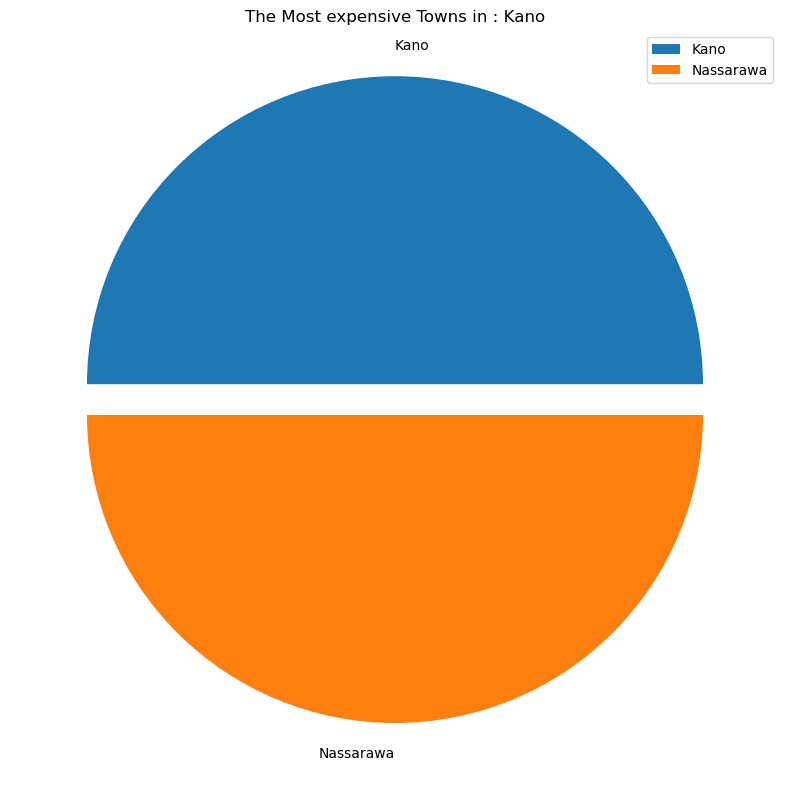

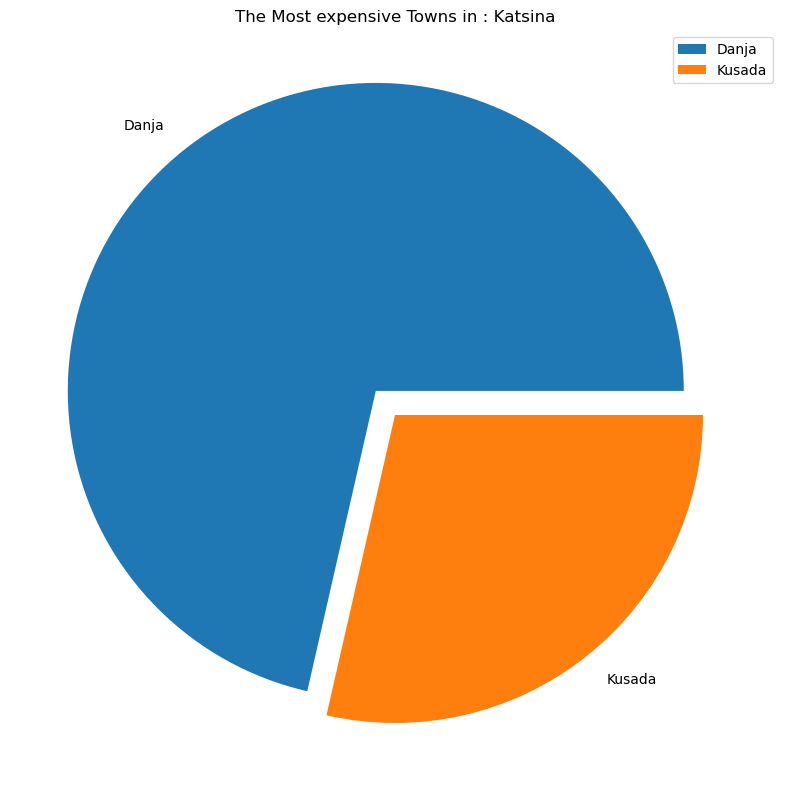

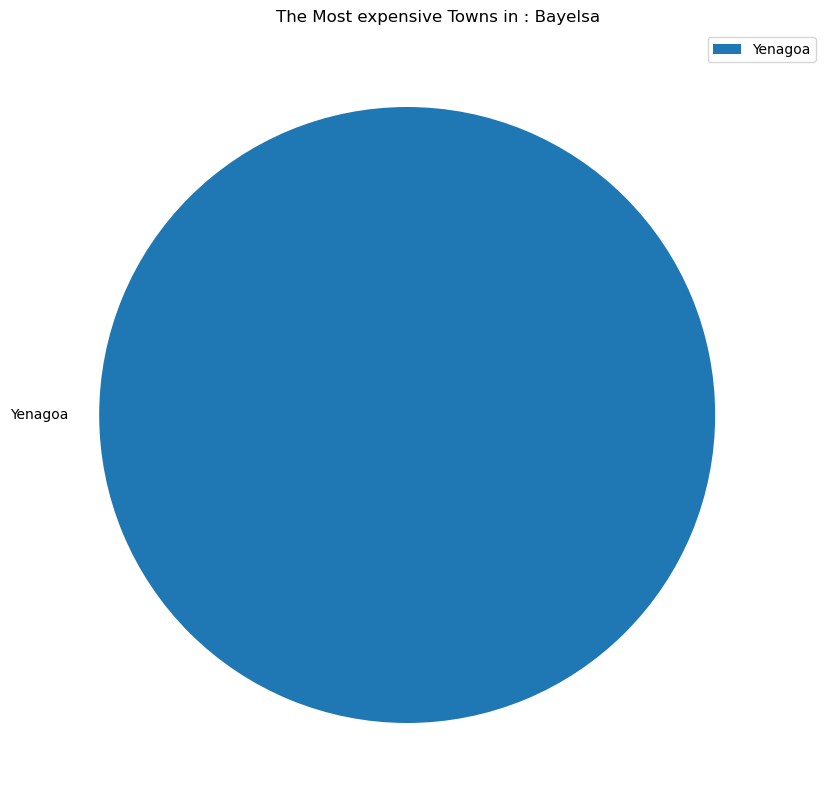

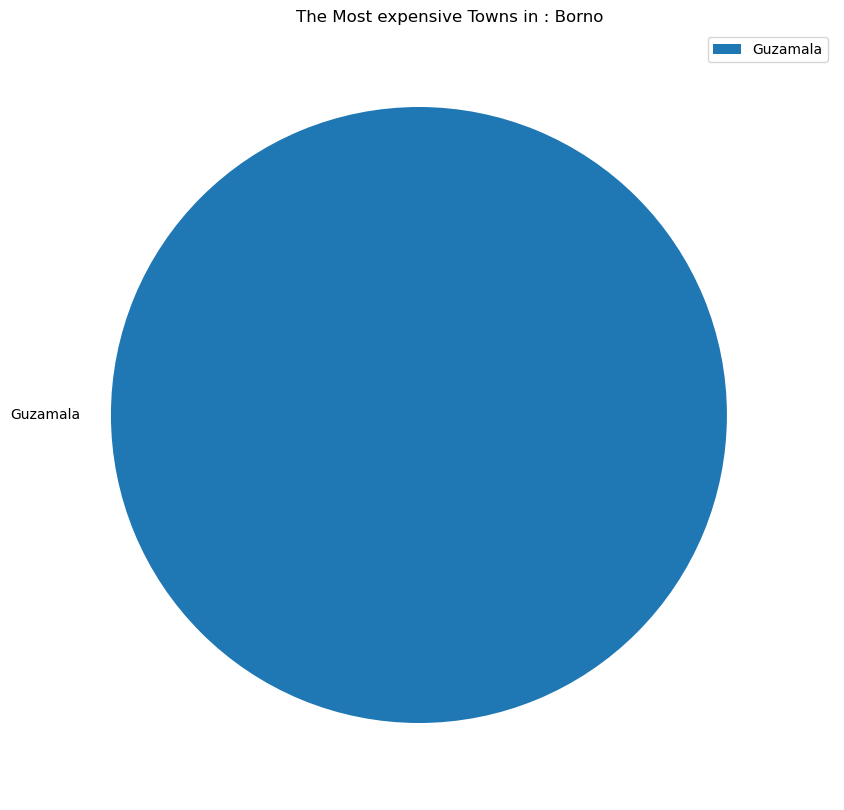

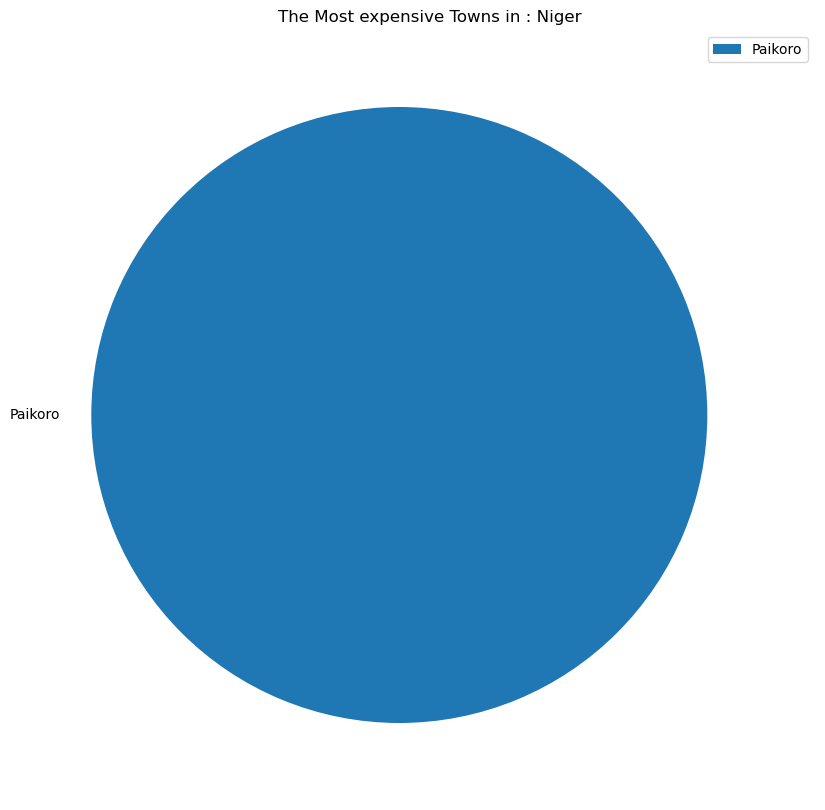

In [119]:
list_state = temp_df.state.unique().tolist()
image_to_path = {}
for index,state in enumerate(list_state):
    towns_value = pie_state_town.drop(columns=["bedrooms","bathrooms","toilets","parking_space"]).loc[(state)].sort_values(by="price",ascending=False)
    labels = towns_value.index.tolist()
    values = towns_value.price.tolist()
    explode = [0] * len(labels)
    explode[0] = 0.1
    plt.figure(figsize=(10,10))
    plt.pie(values, labels = labels, explode = explode,shadow = False)
    plt.title(f"The Most expensive Towns in : {state}")
    plt.legend(loc="best")
    plt.savefig(f"./Nigeria Housing/images/{state}.png")
    image_to_path[state] = f"./images/{state}.png"
    plt.show()

In [121]:
## Save the PATH to the generated images in a json file.
with open("image_to_path.json","w") as f:
    json.dump(image_to_path,f)

## Feature Engineering

In [33]:
df.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')

In [34]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [36]:
## create category labels, that maps rech category to an index
categorical_columns.columns.tolist()
# categorical_columns["title"].unique()
category_label = {}
for col in categorical_columns.columns.tolist():
    category_label[col] = {}
    col_values = categorical_columns[col].unique()
    for index, val in enumerate(col_values):
        category_label[col] = {**category_label[col] ,val:index}
category_label

{'title': {'Detached Duplex': 0,
  'Terraced Duplexes': 1,
  'Semi Detached Duplex': 2,
  'Detached Bungalow': 3,
  'Block of Flats': 4,
  'Semi Detached Bungalow': 5,
  'Terraced Bungalow': 6},
 'town': {'Mabushi': 0,
  'Katampe': 1,
  'Lekki': 2,
  'Ajah': 3,
  'Epe': 4,
  'Lokogoma District': 5,
  'Oredo': 6,
  'Victoria Island (VI)': 7,
  'Mowe Ofada': 8,
  'Ikeja': 9,
  'Ikoyi': 10,
  'Magodo': 11,
  'Kaura': 12,
  'Galadimawa': 13,
  'Gwarinpa': 14,
  'Abeokuta North': 15,
  'Lugbe District': 16,
  'Ibeju Lekki': 17,
  'Yaba': 18,
  'Sango Ota': 19,
  'Ifako-Ijaiye': 20,
  'Agege': 21,
  'Ikorodu': 22,
  'Jahi': 23,
  'Ibadan': 24,
  'Orozo': 25,
  'Ifo': 26,
  'Owerri North': 27,
  'Guzape District': 28,
  'Idu Industrial': 29,
  'Owerri Municipal': 30,
  'Isheri North': 31,
  'Utako': 32,
  'Port Harcourt': 33,
  'Kuje': 34,
  'Isheri': 35,
  'Life Camp': 36,
  'Ipaja': 37,
  'Ado-Odo/Ota': 38,
  'Dape': 39,
  'Mushin': 40,
  'Ejigbo': 41,
  'Isolo': 42,
  'Ojodu': 43,
  'Gaduw

In [37]:
## The categorical dataset has been converted to a numerical columns
for col,mapping in category_label.items():
    df[col] = df[col].map(mapping)

## Feature Scaling

In [38]:
## Since only the price dataset is skewed, some operations need to be performed to reduce the skewness of the dataset
df["price_log"] = np.log1p(df["price"])

In [39]:
new_numerical_columns = df.select_dtypes(include=["number"]).drop(axis=1,columns=["state","town","title","price"])

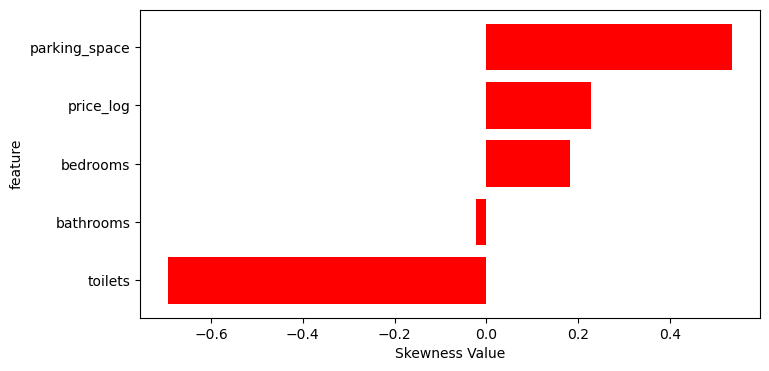

In [40]:
## Configm if skewness in the dataset has been reduced
skewTable = new_numerical_columns.skew().sort_values(ascending=False).reset_index()
skewTable.columns = ['feature', 'skewness_value']
plt.figure(figsize=(8,4))
plt.barh(skewTable['feature'],skewTable['skewness_value'],color="red")
plt.xlabel("Skewness Value")
plt.ylabel("feature")
plt.gca().invert_yaxis()
plt.show()

In [41]:
## It can be observed Our price Log over came the skewness
# Now model is ready to be used

## Model Building and Training

In [43]:
## Divide dataset into X and y for trainign and inference
X = df.drop(columns=["price","price_log"])
y = df["price"]
y_log = df["price_log"]

In [44]:
X = np.asarray(X)

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
scaler

StandardScaler()

In [47]:
## Train Test Split
## Without y transformation(no log)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [48]:
#with y transformation
X_train_with_log_y, X_test_with_log_y, y_train_log, y_test_log = train_test_split(
    X_scaled, y_log, test_size=0.33, random_state=42)

In [49]:
len(X_train),len(y_train)

(16298, 16298)

### lasso

In [268]:

## Model training with Y(Not Transformed) as target variable
param_grid_lasso = {"alpha": [1, 10]}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso,scoring="neg_root_mean_squared_error", cv=5)
grid_lasso.fit(X_train, y_train)
best_lasso = grid_lasso.best_estimator_

lasso_scores = cross_val_score(best_lasso, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
lasso_rmse = -np.mean(lasso_scores)
print(f"[Lasso] CV RMSE Y Normal: {lasso_rmse:.4f}")

[Lasso] CV RMSE Y Normal: 9090744428.5794


In [256]:
## Model training with Y log as target variable
param_grid_lasso = {"alpha": [1, 10]}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso,scoring="neg_root_mean_squared_error", cv=5)
grid_lasso.fit(X_train_with_log_y, y_train_log)
best_lasso = grid_lasso.best_estimator_

lasso_scores = cross_val_score(best_lasso, X_train_with_log_y, y_train_log, scoring="neg_root_mean_squared_error", cv=5)
lasso_rmse = -np.mean(lasso_scores)
print(f"[Lasso] CV RMSE Y Log: {lasso_rmse:.4f}")

[Lasso] CV RMSE Y Log: 1.0631


### Linear Regression

In [297]:

## Model training with Y(Not Transformed) as target variable
lr = LinearRegression()
lr_scores  = cross_val_score(lr, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
lr_rmse  = -np.mean(lr_scores)
print(f"[Linear Regression] CV RMSE Y Normal: {lr_rmse:.4f}")

[Linear Regression] CV RMSE Y Normal: 9090744438.9158


In [302]:

## Model training with Y log as target variable
lr = LinearRegression()
lr_scores  = cross_val_score(lr, X_train_with_log_y, y_train_log, scoring="neg_root_mean_squared_error", cv=5)
lr_rmse  = -np.mean(lr_scores)
print(f"[Linear Regression] CV RMSE Y Normal: {lr_rmse:.4f}")

[Linear Regression] CV RMSE Y Normal: 0.8547


In [303]:
lr.fit(X_train_with_log_y,y_train_log)

LinearRegression()

### Bayesian Ridge

In [304]:
## Model training with Y(Not Transformed) as target variable
param_grid_bayes = {
    "alpha_1":  [1e-6, 1e-5, 1e-4],
    "lambda_1": [1e-6, 1e-5, 1e-4]
}
grid_bayes = GridSearchCV(BayesianRidge(), param_grid_bayes, scoring="neg_root_mean_squared_error", cv=5)
grid_bayes.fit(X_train, y_train)
best_bayes = grid_bayes.best_estimator_

scores_bayes = cross_val_score(best_bayes, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
rmse_bayes = -np.mean(scores_bayes)
print(f"[BayesianRidge] CV RMSE: {rmse_bayes:.4f}")

[BayesianRidge] CV RMSE: 8957792815.9941


In [305]:
## Model training with Y LOG as target variable
param_grid_bayes = {
    "alpha_1":  [1e-6, 1e-5, 1e-4],
    "lambda_1": [1e-6, 1e-5, 1e-4]
}
grid_bayes = GridSearchCV(BayesianRidge(), param_grid_bayes, scoring="neg_root_mean_squared_error", cv=5)
grid_bayes.fit(X_train_with_log_y, y_train_log)
best_bayes = grid_bayes.best_estimator_

scores_bayes = cross_val_score(best_bayes, X_train_with_log_y, y_train_log, scoring="neg_root_mean_squared_error", cv=5)
rmse_bayes = -np.mean(scores_bayes)
print(f"[BayesianRidge] CV RMSE: {rmse_bayes:.4f}")

[BayesianRidge] CV RMSE: 0.8547


In [ ]:
## It can be Observed that the best model is The bayesian Ridge with the transformed log

## Performing Inference

In [306]:
## Inference with the Models
y_pred_bayes = best_bayes.predict(X_test_with_log_y)
y_pred_lr = lr.predict(X_test_with_log_y)
y_pred_lasso = best_lasso.predict(X_test_with_log_y)

In [282]:
## Using the MSE as a metric to determine the performance of the model.
from sklearn.metrics import mean_squared_error
loss_bayes = mean_squared_error(y_pred_bayes, y_test_log)
loss_lr = mean_squared_error(y_pred_lr, y_test_log)
loss_lasso =  mean_squared_error(y_pred_lasso, y_test_log)
print(f"""
        -------------------------------
                BayesianRidge 
        -------------------------------
        {loss_bayes}
        -------------------------------

        -------------------------------
                Linear Regression 
        -------------------------------
        {loss_lr}
        -------------------------------
                Lasso Regression 
        -------------------------------
        {loss_lasso}
      """)


        -------------------------------
                BayesianRidge 
        -------------------------------
        0.6668054719325498
        -------------------------------

        -------------------------------
                Linear Regression 
        -------------------------------
        0.6667989171206259
        -------------------------------
                Lasso Regression 
        -------------------------------
        1.0903704043080984
      


In [307]:
## Using the RMSE as a metric to determine the performance of the model.
from sklearn.metrics import root_mean_squared_error
loss_bayes = root_mean_squared_error(y_pred_bayes, y_test_log)
loss_lr = root_mean_squared_error(y_pred_lr, y_test_log)
loss_lasso =  root_mean_squared_error(y_pred_lasso, y_test_log)
print(f"""
        -------------------------------
                BayesianRidge 
        -------------------------------
        {loss_bayes}
        -------------------------------

        -------------------------------
                Linear Regression 
        -------------------------------
        {loss_lr}
        -------------------------------
                Lasso Regression 
        -------------------------------
        {loss_lasso}
      """)


        -------------------------------
                BayesianRidge 
        -------------------------------
        0.816581577022498
        -------------------------------

        -------------------------------
                Linear Regression 
        -------------------------------
        0.8165775634442977
        -------------------------------
                Lasso Regression 
        -------------------------------
        681456833.8446841
      


In [ ]:
## In evaluation ,Linear regression and Bayesian Ridge has the lowest loss using the MSE metrics.

In [50]:
## It can be seen that the two best models are the bayerisn ridge and the LR model

In [308]:
## Utility Function to predict the price of a house with the following features available
def calculate_price(bedrooms,bathrooms,toilets,parking_space,title,town,state):
    title_index = category_label["title"][title]
    town_index = category_label["town"][town]
    state_index = category_label["state"][state]

    features = np.array([bedrooms,bathrooms,toilets,parking_space,title_index,town_index,state_index]).reshape(1,-1)
    feature_scaled = scaler.transform(features)
    prediction = lr.predict(feature_scaled)[0]
    print(feature_scaled)
    # print(np.exp(prediction))
    return np.expm1(prediction)

calculate_price(bedrooms=6,bathrooms=5,toilets=5,parking_space=4,title="Detached Duplex",town="Mabushi",state="Abuja")

[[ 1.45913346  0.34321194 -0.14381868 -0.02980548 -0.70298764 -0.64064834
  -0.76687673]]


195194312.27619904

In [290]:
np.expm1(lr.predict(X_test_with_log_y[0].reshape(1,-1)))

array([2.09577018e+08])

In [286]:
np.expm1(y_test_log[0])

449999999.9999995

## Saving Necessary files to build application

In [309]:
import pickle

In [310]:
with open('model.pickle', 'wb') as f:
    pickle.dump(lr,f)

In [316]:
with open('category_indexs.json', 'wb') as f:
    pickle.dump(category_label,f)

In [318]:
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler,f)

In [275]:
np.expm1([0.2])

array([0.22140276])

In [276]:
np.exp([0.2])

array([1.22140276])

In [25]:
categorical_columns.columns.tolist()

['title', 'town', 'state']

In [35]:
state_town_map = categorical_columns.groupby(["state","town"]).sum().index
state_town_map

MultiIndex([(   'Abia',                       'Aba'),
            (   'Abia',                   'Umuahia'),
            (  'Abuja',                       'Apo'),
            (  'Abuja',          'Asokoro District'),
            (  'Abuja',                     'Bwari'),
            (  'Abuja', 'Central Business District'),
            (  'Abuja',                  'Dakibiyu'),
            (  'Abuja',                     'Dakwo'),
            (  'Abuja',                      'Dape'),
            (  'Abuja',                   'Dei-Dei'),
            ...
            (    'Oyo',                       'Ido'),
            (    'Oyo',                   'Oluyole'),
            (    'Oyo',                  'Oyo West'),
            ('Plateau',                 'Jos North'),
            ('Plateau',                 'Jos South'),
            ( 'Rivers',                     'Eleme'),
            ( 'Rivers',                   'Ikwerre'),
            ( 'Rivers',                'Obio-Akpor'),
            

In [37]:
state_town_map[2]

('Abuja', 'Apo')

In [43]:
## A python code to generate state town relationship e.g
# {
#     "Abuja":["town1","town2","town3"],
#     "Oyo":["Ibadan"]
# }
state_town_relationship = {}
for (state,town) in state_town_map:
    if state in state_town_relationship:
        state_town_relationship[state].append(town)
    else:
        state_town_relationship[state] = []
        state_town_relationship[state].append(town)

In [47]:
## Saving the generated file
import json
with open('state_town_relationship.json', 'w') as f:
    json.dump(state_town_relationship,f)

# Revelation: The end